In [166]:
import pandas as pd
health_file = "./Health.csv"

#handle missing values 
health=pd.read_csv(health_file,
                   na_values="N/A")
#drop missing values
health= health.dropna()
#preview the dataset
print (health.head())
#total number of individuals after dropping out the missing values
health.count()

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   

   stroke  
0       1  
2       1  
3       1  
4       1  
5       1  


id                   4909
gender               4909
age                  4909
hypertension         4909
heart_disease        4909
ever_married         4909
work_type            4909
Residence_type       4909
avg_glucose_level    4909
bmi                  4909
smoking_status       4909
stroke               4909
dtype: int64

In [74]:
# Descriptive statistics
# Numerical columns descriptive stats
numerical_stats = health.describe()

# Categorical columns descriptive stats
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                       'work_type', 'Residence_type', 'smoking_status', 'stroke']
categorical_stats = {col: health[col].value_counts() for col in categorical_columns}

# Check for missing values
missing_values = health.isnull().sum()

# Print results
print("Numerical Descriptive Stats:\n", numerical_stats)
print("\nCategorical Descriptive Stats:\n")
for col, stats in categorical_stats.items():
    print(f"{col}:\n{stats}\n")
print("\nMissing Values:\n", missing_values)


Numerical Descriptive Stats:
                  id          age  hypertension  heart_disease  \
count   4909.000000  4909.000000   4909.000000    4909.000000   
mean   37064.313506    42.865374      0.091872       0.049501   
std    20995.098457    22.555115      0.288875       0.216934   
min       77.000000     0.080000      0.000000       0.000000   
25%    18605.000000    25.000000      0.000000       0.000000   
50%    37608.000000    44.000000      0.000000       0.000000   
75%    55220.000000    60.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        4909.000000  4909.000000  4909.000000  
mean          105.305150    28.893237     0.042575  
std            44.424341     7.854067     0.201917  
min            55.120000    10.300000     0.000000  
25%            77.070000    23.500000     0.000000  
50%            91.680000    28.100000     0.000000  
75%          

In [167]:
#2. Gender distribution and prevalence of hypertension, heart disease and stroke
health["gender"] == "Female" #filtering
female= health["gender"]== "Female"
# number of individuals in each gender category
health["gender"].value_counts()

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

In [168]:
# percentage distribution for gender
female.value_counts(normalize=True)*100


gender
True     59.014056
False    40.985944
Name: proportion, dtype: float64

In [169]:
#prevalence of hypertention by gender
hypertension_by_gender = health.groupby('gender')['hypertension'].mean() * 100

#prevalence of heart disease by gender
heartdisease_by_gender = health.groupby('gender')['heart_disease'].mean() * 100

#prevalence of stroke by gender
stroke_by_gender= health.groupby("gender")["stroke"].mean()*100

#print results
print("\nPrevalence of Hypertension by Gender (%):")
print(hypertension_by_gender)
print("\nPrevalence of Heart disease by Gender (%):")
print(heartdisease_by_gender)
print("Prevalnce of Stroke by Gender (%):")
print(stroke_by_gender)


Prevalence of Hypertension by Gender (%):
gender
Female    8.664135
Male      9.945301
Other     0.000000
Name: hypertension, dtype: float64

Prevalence of Heart disease by Gender (%):
gender
Female    3.451847
Male      7.110890
Other     0.000000
Name: heart_disease, dtype: float64
Prevalnce of Stroke by Gender (%):
gender
Female    4.142216
Male      4.425659
Other     0.000000
Name: stroke, dtype: float64


In [170]:
#Chi-Square Test of Independence to test those relationship
from scipy.stats import chi2_contingency
#gender-hypertension
# Create a contingency table
contingency_table = pd.crosstab(health['gender'], health['hypertension'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"p-value: {p:.5f}")

Chi-Square Test Results:
Chi2 Statistic: 2.44
p-value: 0.29575


Chi-Square Test Results:
Chi2 Statistic: 33.83
p-value: 0.00000


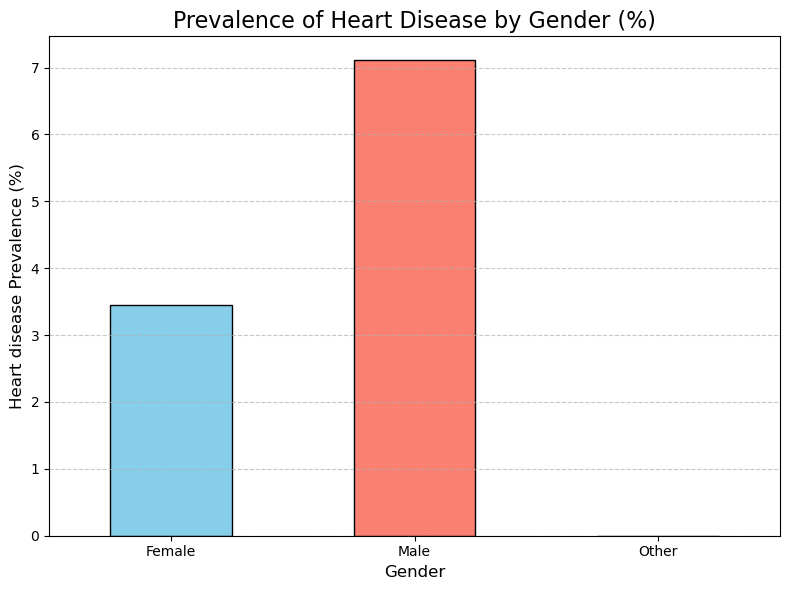

In [171]:
#gender-heart disease
# Create a contingency table
contingency_table = pd.crosstab(health['gender'], health['heart_disease'])

# Perform Chi-Square test for heart disease by gender
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"p-value: {p:.5f}")

# Create a bar plot
plt.figure(figsize=(8, 6))
heartdisease_by_gender.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Add titles and labels
plt.title('Prevalence of Heart Disease by Gender (%)', fontsize=16)
plt.ylabel('Heart disease Prevalence (%)', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Chi-Square Test Results:
Chi2 Statistic: 0.28
p-value: 0.87004


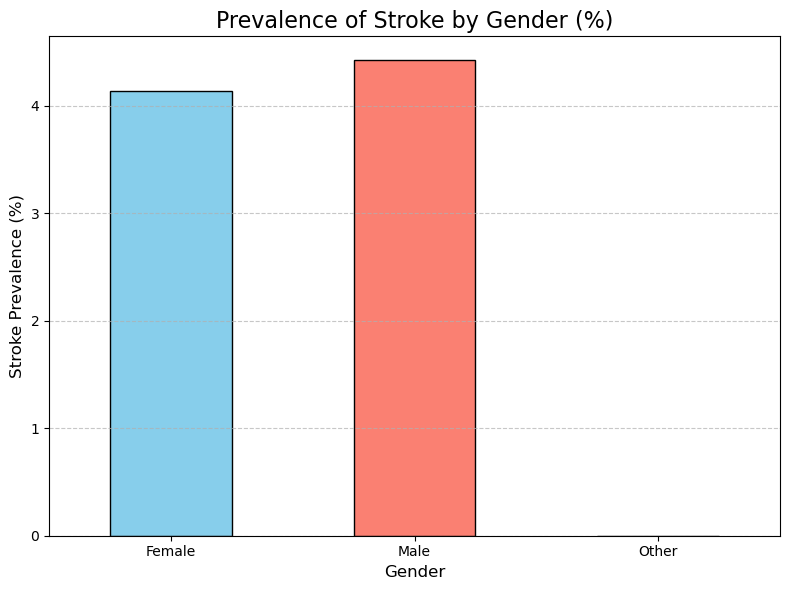

In [172]:
#gender-stroke
# Create a contingency table 
contingency_table = pd.crosstab(health['gender'], health['stroke'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"p-value: {p:.5f}")#heart disease-stroke

# Create a bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
stroke_by_gender.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Add titles and labels
plt.title('Prevalence of Stroke by Gender (%)', fontsize=16)
plt.ylabel('Stroke Prevalence (%)', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Chi-Square Test Results:
Chi2 Statistic: 90.28
p-value: 0.00000


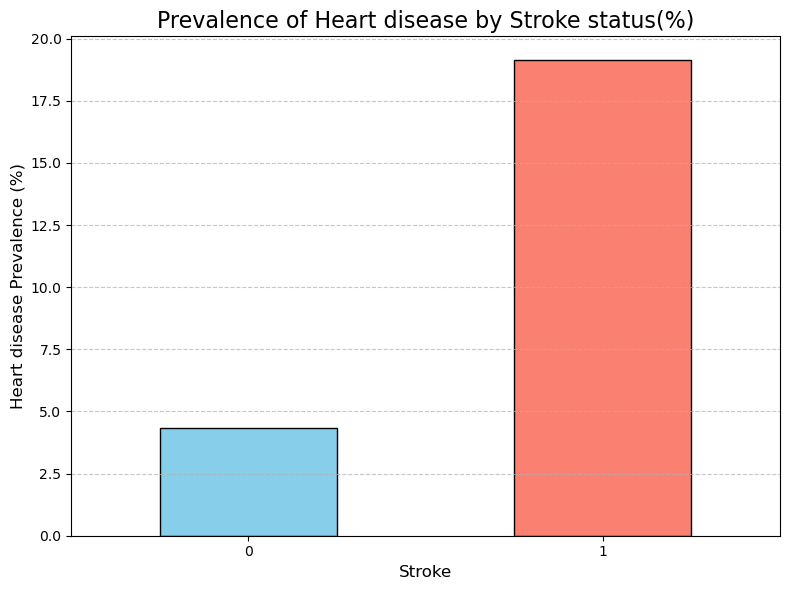

Chi-Square Test Results:
Chi2 Statistic: 97.27
p-value: 0.00000


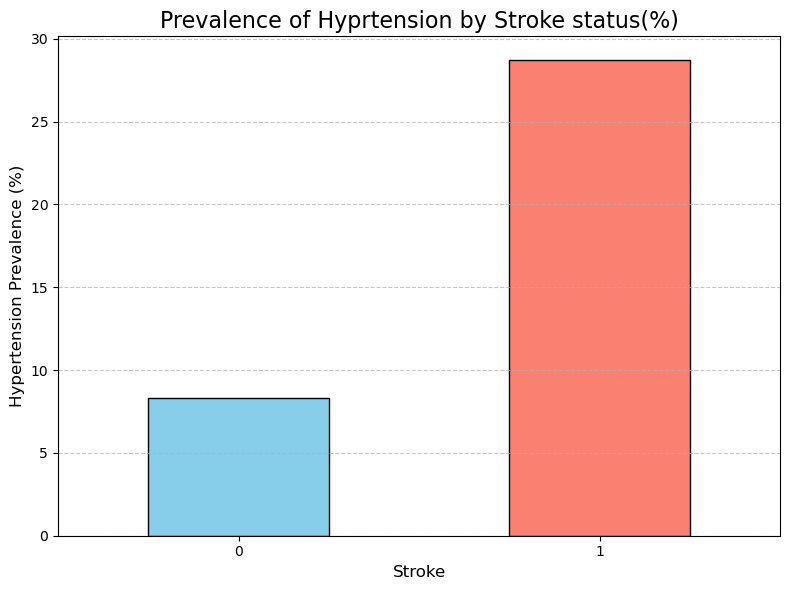

In [175]:
#what about heart-disease and stroke?
#heart disease-stroke
# Create a contingency table 
contingency_table = pd.crosstab(health['stroke'], health['heart_disease'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"p-value: {p:.5f}")
#prevalence of heart disease by stroke 
heartdisease_by_stroke= health.groupby("stroke")["heart_disease"].mean()*100
# Create a bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
heartdisease_by_stroke.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Add titles and labels
plt.title('Prevalence of Heart disease by Stroke status(%)', fontsize=16)
plt.ylabel('Heart disease Prevalence (%)', fontsize=12)
plt.xlabel('Stroke', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

#stroke-hypertension# Create a contingency table 
contingency_table = pd.crosstab(health['stroke'], health['hypertension'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"p-value: {p:.5f}")
#prevalence of heart disease by stroke 
heartdisease_by_stroke= health.groupby("stroke")["hypertension"].mean()*100
# Create a bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
heartdisease_by_stroke.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Add titles and labels
plt.title('Prevalence of Hyprtension by Stroke status(%)', fontsize=16)
plt.ylabel('Hypertension Prevalence (%)', fontsize=12)
plt.xlabel('Stroke', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

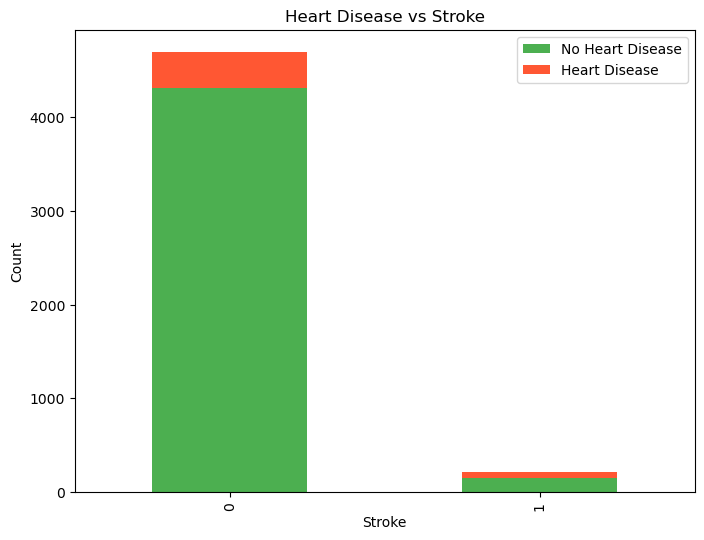

In [176]:
#a stacked bar chart to illustrate the relationship between heart disease and stroke.
contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#4CAF50', '#FF5733'])
plt.title("Heart Disease vs Stroke")
plt.xlabel("Stroke")
plt.ylabel("Count")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.show()

In [177]:
#Calculate Cramér's V to measure the strength of association
import numpy as np
n = contingency_table.to_numpy().sum()
cramers_v = np.sqrt(chi2 / (n * min(contingency_table.shape) - 1))
print(f"Cramér's V: {cramers_v:.2f}")


Cramér's V: 0.10


In [178]:
#comparison of average glucose levels between individuals who had stroke
from scipy.stats import ttest_ind
#group data by stroke status
glucose_comparison= health.groupby('stroke')['avg_glucose_level'].mean()
print(glucose_comparison)

stroke
0    104.003736
1    134.571388
Name: avg_glucose_level, dtype: float64


Glucose Levels: t-statistic = 7.001495143391008, p-value = 3.1279262491339954e-11


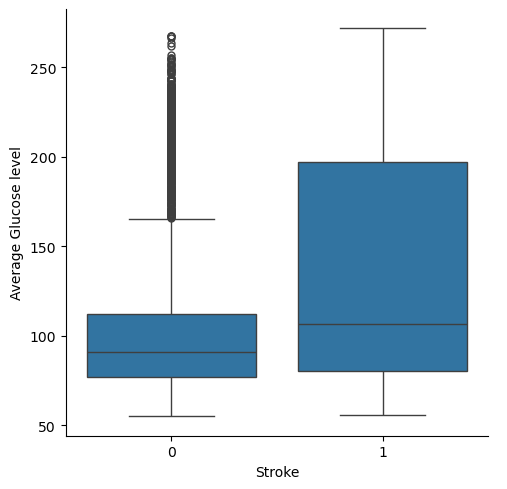

In [179]:
# t-test to check statistical significance
stroke_group = health[health['stroke'] == 1]
no_stroke_group = health[health['stroke'] == 0]

# T-test for glucose levels
t_test_glucose = ttest_ind(stroke_group['avg_glucose_level'], 
                           no_stroke_group['avg_glucose_level'], 
                           equal_var=False)
print(f"Glucose Levels: t-statistic = {t_test_glucose.statistic}, p-value = {t_test_glucose.pvalue}")
#plot the data
import seaborn as sns
sns.catplot(
    data=health,
    x="stroke",
    y="avg_glucose_level",
    kind="box",
).set(
    xlabel="Stroke",
    ylabel="Average Glucose level",
)

In [180]:
# Group the data by stroke status-BMI
bmi_comparison=health.groupby("stroke")["bmi"].mean()
print(bmi_comparison)

stroke
0    28.823064
1    30.471292
Name: bmi, dtype: float64


BMI: t-statistic = 3.6404100561556993, p-value = 0.0003339710013121601


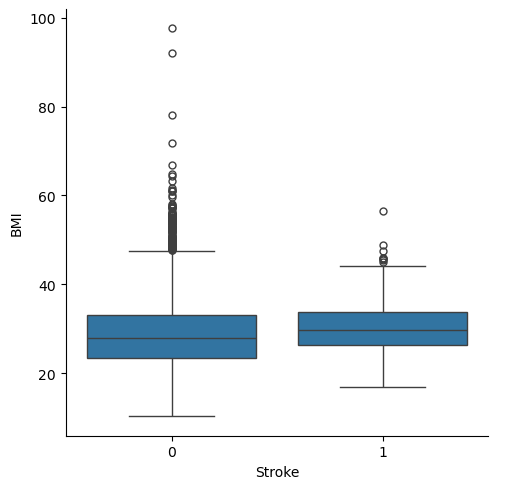

In [181]:
t_test_bmi = ttest_ind(stroke_group['bmi'].dropna(), 
                           no_stroke_group['bmi'].dropna(), 
                           equal_var=False)
print(f"BMI: t-statistic = {t_test_bmi.statistic}, p-value = {t_test_bmi.pvalue}")
#plot
sns.catplot(
    data=health,
    x="stroke",
    y="bmi",
    kind="box"
). set(
    xlabel="Stroke",
    ylabel="BMI",
)

stroke
0    41.760451
1    67.712919
Name: age, dtype: float64
Age: t-statistic = 28.29061007686151, p-value = 5.877629205726294e-83


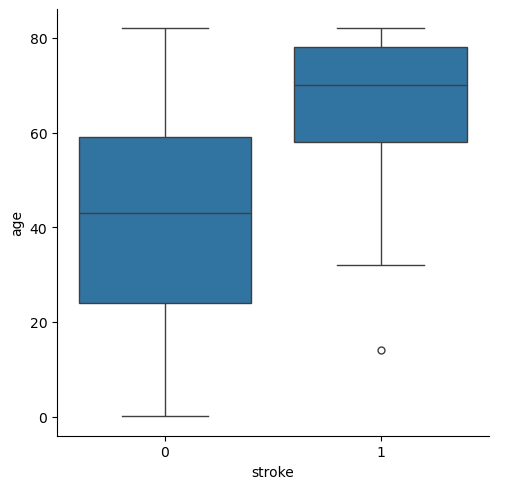

In [182]:
#age
age_comparison= health.groupby('stroke')['age'].mean()
print(age_comparison)
t_test_age = ttest_ind(stroke_group['age'], 
                           no_stroke_group['age'], 
                           equal_var=False)
print(f"Age: t-statistic = {t_test_age.statistic}, p-value = {t_test_age.pvalue}")
#plot
sns.catplot(
    data=health,
    x="stroke",
    y="age",
    kind="box",
)

In [183]:
#How about stroke-smoking status?
print(health["smoking_status"])
# Calculate the percentage of each smoking status category
smoking_status_counts = health['smoking_status'].value_counts(normalize=True) * 100

# Display the result
print(smoking_status_counts)

0       formerly smoked
2          never smoked
3                smokes
4          never smoked
5       formerly smoked
             ...       
5104            Unknown
5106       never smoked
5107       never smoked
5108    formerly smoked
5109            Unknown
Name: smoking_status, Length: 4909, dtype: object
smoking_status
never smoked       37.726625
Unknown            30.209819
formerly smoked    17.050316
smokes             15.013241
Name: proportion, dtype: float64


In [184]:
stroke_by_smoking = health.groupby("smoking_status")["stroke"].mean() * 100
print("Stroke Prevalence by Smoking Status (%):")
print(stroke_by_smoking)



Stroke Prevalence by Smoking Status (%):
smoking_status
Unknown            1.955496
formerly smoked    6.810036
never smoked       4.535637
smokes             5.291723
Name: stroke, dtype: float64


In [185]:
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(health['smoking_status'], health['stroke'])
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test Results:\nChi2 Statistic: {chi2}\np-value: {p}")


Contingency Table:
stroke              0   1
smoking_status           
Unknown          1454  29
formerly smoked   780  57
never smoked     1768  84
smokes            698  39
Chi-Square Test Results:
Chi2 Statistic: 34.9434924570628
p-value: 1.2522021032753853e-07


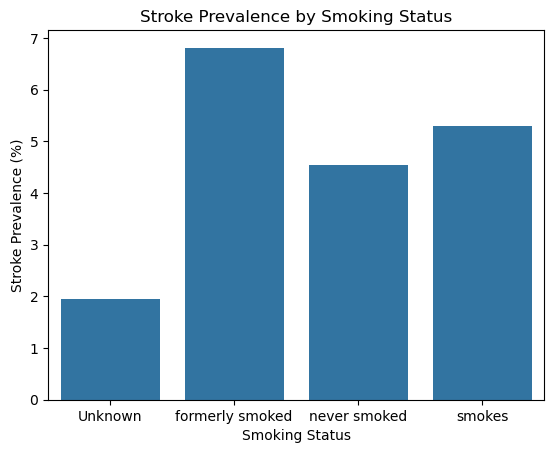

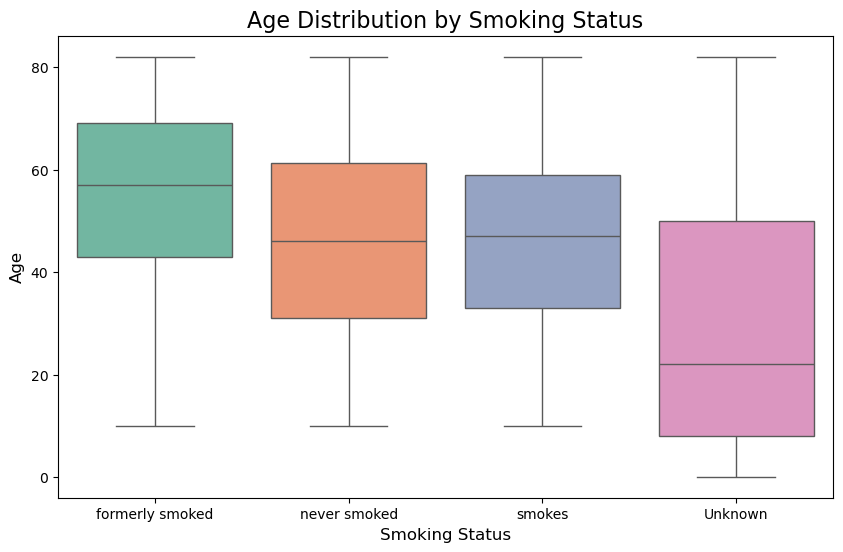

In [186]:
#plot data
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for stroke prevalence by smoking status
sns.barplot(x=stroke_by_smoking.index, y=stroke_by_smoking.values)
plt.title("Stroke Prevalence by Smoking Status")
plt.ylabel("Stroke Prevalence (%)")
plt.xlabel("Smoking Status")
plt.show()

#is there a relationship betwee age and smoking status 
# Create a boxplot for age distribution by smoking status
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=health, x="smoking_status", y="age", hue="smoking_status", dodge=False, palette="Set2", showfliers=True)
plt.title("Age Distribution by Smoking Status", fontsize=16)
plt.xlabel("Smoking Status", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.legend([],[], frameon=False )
plt.show()

In [187]:
#Analyze how multiple variables collectively influence stroke risk
#Perform logistic regression to predict the likelihood of having a stroke (stroke = 0 or 1).
import pandas as pd
health = pd.read_csv("./Health.csv")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
#
# Handle missing values 
health = health.dropna() 

#convert string labels into numbers
from sklearn.preprocessing import LabelEncoder

# For the 'smokes' column
label_encoder = LabelEncoder()

# Fit and transform the 'smokes' column
health['smoking_status'] = label_encoder.fit_transform(health['smoking_status'])

# Checking if the conversion worked
print(health['smoking_status'].head())
print(list(label_encoder.classes_))
# Convert 'Female' -> 0 and 'Male' -> 1
health['gender'] = health['gender'].map({'Female': 0, 'Male': 1})
health['gender'] = label_encoder.fit_transform(health['gender'])
print(health['gender'].head())

0    1
2    2
3    3
4    2
5    1
Name: smoking_status, dtype: int32
['Unknown', 'formerly smoked', 'never smoked', 'smokes']
0    1
2    1
3    0
4    0
5    1
Name: gender, dtype: int64


In [188]:
# Define features and target
features = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'smoking_status']
X = pd.get_dummies(health[features], drop_first=True)  # One-hot encode categorical variables
y = health['stroke']  # The target variable
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [189]:
# Fit the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [190]:
#now we can use the model to make predictions
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [191]:
#evaluate the model's performance using ROC-AUC Score
roc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_score}")


ROC-AUC Score: 0.8560229096005036


In [192]:

#To determine which features (X values) strongly predict stroke,  i used the coefficients of my logistic regression model
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
coefficients['Abs Coefficient'] = coefficients['Coefficient'].abs()

# Sort by absolute coefficient to find the most influential features
coefficients = coefficients.sort_values(by='Abs Coefficient', ascending=False)
print(coefficients)




                   Coefficient  Abs Coefficient
hypertension          0.393149         0.393149
heart_disease         0.312465         0.312465
smoking_status        0.110378         0.110378
age                   0.067915         0.067915
avg_glucose_level     0.005476         0.005476
bmi                   0.002971         0.002971
